# Aprendizado de conluio em licitações públicas
## Etapas do pré-processamento

## ver qual atributo selecionado na primeira execucao (ano ou mes)

In [1]:
#!pip install pyodbc
#!pip install mlxtend
#!pip install xlrd
#!pip install lime
#!pip install shap
#!pip install imblearn
#!pip install seaborn
#!pip install psycopg2
#!pip install category_encoders
#!pip install xgboost

In [2]:
import pandas as pd
import gc

## Carregar dados de licitações do governo Federal

#### Fonte: https://portaldatransparencia.gov.br/download-de-dados/licitacoes

### Carregar dados - Licitações

In [3]:
import os

In [4]:
def get_files_dir (pasta, ano):
    df = pd.DataFrame()
    for a in os.listdir(pasta):
        arquivo = pasta+'\\'+a
        if os.path.isfile(arquivo):     
            df_t = pd.read_csv(arquivo, sep=';', encoding='utf-8', low_memory=False)
            df = pd.concat([df, df_t], ignore_index=True)
        elif a == ano:
            df_t = get_files_dir (arquivo, ano)
            df = pd.concat([df, df_t], ignore_index=True)
    return df 

In [5]:
def get_files (dir, ano):   
    df = get_files_dir (dir, ano)
    df = df.drop_duplicates(ignore_index=True)
    #Só faz sentido avaliar quem tem concorrente
    df = df.loc[(df['Modalidade Compra'] != "Inexigibilidade de Licitação") & (df['Modalidade Compra'] != "Dispensa de Licitação")]
    return df

In [6]:
#Carregar a partir dos arquivos
def carregar_dados (anos):
    dir_licit = 'C:\\Users\\lucas\\Downloads\\Cefet-RJ\\Licitacao'
    dir_item = 'C:\\Users\\lucas\\Downloads\\Cefet-RJ\\ItemLicitacao'
    dir_partic = 'C:\\Users\\lucas\\Downloads\\Cefet-RJ\\ParticipantesLicitacao'
    df_u = pd.DataFrame()
    for a in anos:
        print ('Ano: '+a)
        df_item = get_files (dir_item, a)
        print ('Total Item: ', df_item.shape)
        df_partic = get_files (dir_partic, a)
        print ('Total Participantes: ',df_partic.shape)
        df_t = df_partic.merge(df_item, left_index=False, right_index=False, how="inner")
        df_licit = get_files (dir_licit, a)
        print ('Total Licitações: ',df_licit.shape)
        df_t = df_t.merge(df_licit, left_index=False, right_index=False, how="inner")
        print ('Total: ',df_t.shape)
        del(df_item, df_partic, df_licit)
        n = gc.collect()
        #Antecipa exclusão de colunas código (redundantes) para evitar problemas de memória
        cols = [x for x in df_t.columns if 'Código' in x]
        df_t.drop(columns=cols, inplace=True)
        df_u = pd.concat([df_u, df_t], ignore_index=True)
        del(df_t)
    print ('Total')
    print (df_u.shape)
    return df_u

In [7]:
anos = ['2013', '2014', '2015', '2016', '2017', '2018']

In [8]:
df_u = carregar_dados(anos)

Ano: 2013
Total Item:  (1202710, 14)
Total Participantes:  (8760019, 13)
Total Licitações:  (46616, 17)
Total:  (8606933, 27)
Ano: 2014
Total Item:  (1205338, 14)
Total Participantes:  (8293507, 13)
Total Licitações:  (46187, 17)
Total:  (8169073, 27)
Ano: 2015
Total Item:  (1022420, 14)
Total Participantes:  (7176613, 13)
Total Licitações:  (36997, 17)
Total:  (7076919, 27)
Ano: 2016
Total Item:  (1040179, 14)
Total Participantes:  (6873577, 13)
Total Licitações:  (37121, 17)
Total:  (6794974, 27)
Ano: 2017
Total Item:  (978603, 14)
Total Participantes:  (6846230, 13)
Total Licitações:  (34716, 17)
Total:  (6784984, 27)
Ano: 2018
Total Item:  (933067, 14)
Total Participantes:  (6416964, 13)
Total Licitações:  (33331, 17)
Total:  (6363128, 27)
Total
(43796011, 20)


In [9]:
df_u.head(50)

,Número Licitação,Nome UG,Modalidade Compra,Número Processo,Nome Órgão,Descrição Item Compra,Nome Participante,Flag Vencedor,Descrição,Quantidade Item,Valor Item,Nome Vencedor,Objeto,Situação Licitação,Nome Órgão Superior,UF,Município,Data Resultado Compra,Data Abertura,Valor Licitação
0,12010,26 GRUPO DE ARTILHARIA DE CAMPANHA,Tomada de Preços,001,Comando do Exército,CANTINA / BAR / LANCHONETE / REFEICAO RAPIDA /...,CONTRATADO : GILDA DE FATIMA DOS SANTOS - ME -,SIM,CANTINA / BAR / LANCHONETE / REFEICAO RAPIDA /...,1,"1158,3400",CONTRATADO : GILDA DE FATIMA DOS SANTOS - ME -,Objeto: Cessão de dependências interna para pr...,Evento de Resultado de Julgame,Ministério da Defesa,PR,GUARAPUAVA,24/01/2013,NaN,"1158,3400"
1,12012,UNIVERSIDADE FEDERAL RURAL DA AMAZONIA,Concorrência,23084.007315/2012,Universidade Federal Rural da Amazônia,OBRAS CIVIS PUBLICAS ( CONSTRUCAO ),R M H ENGENHARIA LTDA,SIM,OBRAS CIVIS PUBLICAS ( CONSTRUCAO ),1,"4278450,8000",R M H ENGENHARIA LTDA,Objeto: Contratação de empresa(s) especializad...,Evento de Alteração de Resulta,Ministério da Educação,PA,BELEM,15/01/2013,NaN,"6588848,3500"
2,12012,UNIVERSIDADE FEDERAL RURAL DA AMAZONIA,Concorrência,23084.007315/2012,Universidade Federal Rural da Amazônia,OBRAS CIVIS PUBLICAS ( CONSTRUCAO ),R M H ENGENHARIA LTDA,SIM,OBRAS CIVIS PUBLICAS ( CONSTRUCAO ),1,"2217180,7900",R M H ENGENHARIA LTDA,Objeto: Contratação de empresa(s) especializad...,Evento de Alteração de Resulta,Ministério da Educação,PA,BELEM,15/01/2013,NaN,"6588848,3500"
3,12012,UNIVERSIDADE FEDERAL RURAL DA AMAZONIA,Concorrência,23084.007315/2012,Universidade Federal Rural da Amazônia,OBRAS CIVIS PUBLICAS ( CONSTRUCAO ),VIVA SERVICOS DE MAO DE OBRA LTDA,SIM,OBRAS CIVIS PUBLICAS ( CONSTRUCAO ),1,"93216,7600",VIVA SERVICOS DE MAO DE OBRA LTDA,Objeto: Contratação de empresa(s) especializad...,Evento de Alteração de Resulta,Ministério da Educação,PA,BELEM,15/01/2013,NaN,"6588848,3500"
4,12012,IFSULDEMINAS - CAMPUS INCONFIDENTES,Convite,23344000613201201,Instituto Federal do Sul de Minas Gerais,OBRAS CIVIS DE PAVIMENTACAO DE CONCRETO,UIRAPURU INDUSTRIA E COMERCIO DE PRE-MOLDADOS ...,SIM,OBRAS CIVIS DE PAVIMENTACAO DE CONCRETO,1,"38824,7700",UIRAPURU INDUSTRIA E COMERCIO DE PRE-MOLDADOS ...,Objeto: Contratação de empresa para execução d...,Evento de Resultado de Julgame,Ministério da Educação,MG,INCONFIDENTES,22/01/2013,NaN,"38824,7700"
5,12012,BASE DE APOIO LOGISTICO DO EXERCITO,Pregão - Registro de Preço,65261.000512/2012,Comando do Exército,COLETA DE LIXO - RESIDENCIAL / COMERCIAL / IND...,SANETRAN - SANEAMENTO AMBIENTAL LTDA,NÃO,COLETA DE LIXO - RESIDENCIAL / COMERCIAL / IND...,36,"53640,0000",DEPOSITO DE PAPEL SANTA CECILIA LTDA,Objeto: Pregão Eletrônico - Contratação de se...,Publicado,Ministério da Defesa,RJ,RIO DE JANEIRO,08/01/2013,04/12/2012,"2880,0000"
6,12012,BASE DE APOIO LOGISTICO DO EXERCITO,Pregão - Registro de Preço,65261.000512/2012,Comando do Exército,COLETA DE LIXO - RESIDENCIAL / COMERCIAL / IND...,ABORGAMA DO BRASIL LTDA,NÃO,COLETA DE LIXO - RESIDENCIAL / COMERCIAL / IND...,36,"53640,0000",DEPOSITO DE PAPEL SANTA CECILIA LTDA,Objeto: Pregão Eletrônico - Contratação de se...,Publicado,Ministério da Defesa,RJ,RIO DE JANEIRO,08/01/2013,04/12/2012,"2880,0000"
7,12012,BASE DE APOIO LOGISTICO DO EXERCITO,Pregão - Registro de Preço,65261.000512/2012,Comando do Exército,COLETA DE LIXO - RESIDENCIAL / COMERCIAL / IND...,ATUAL 2005 - COLETA DE RESIDUOS LTDA,NÃO,COLETA DE LIXO - RESIDENCIAL / COMERCIAL / IND...,36,"53640,0000",DEPOSITO DE PAPEL SANTA CECILIA LTDA,Objeto: Pregão Eletrônico - Contratação de se...,Publicado,Ministério da Defesa,RJ,RIO DE JANEIRO,08/01/2013,04/12/2012,"2880,0000"
8,12012,BASE DE APOIO LOGISTICO DO EXERCITO,Pregão - Registro de Preço,65261.000512/2012,Comando do Exército,COLETA DE LIXO - RESIDENCIAL / COMERCIAL / IND...,GELMAR COMERCIO E SERVICOS LTDA,NÃO,COLETA DE LIXO - RESIDENCIAL / COMERCIAL / IND...,36,"53640,0000",DEPOSITO DE PAPEL SANTA CECILIA LTDA,Objeto: Preg

In [10]:
#Padroniza nomes colunas
df_u.columns = df_u.columns.str.upper().str.replace(' ', '_')
df_u.columns = df_u.columns.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

In [11]:
n = gc.collect()
print("Número de objetos coletados pela função GC:", n)
print("Objetos restantes:", gc.garbage)

Número de objetos coletados pela função GC: 28
Objetos restantes: []


## Análise exploratória dos dados e Pré-processamento

### Informações gerais dos atributos

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
def escalar_df(df_t):
    df = df_t.copy()
    objList = df.select_dtypes(include = ['object', 'category']).columns
    labelencoder = LabelEncoder()
    for feat in objList:
        df[feat] = labelencoder.fit_transform(df[feat].astype(str))
    scaler = MinMaxScaler()
    scaler.fit(df)
    scaled = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled, columns=df.columns)
    return scaled_df

In [13]:
#Avalia atributos com muitos valores únicos
df = df_u.applymap(str)
df.describe(include=[object])
del df

In [14]:
#Avalia atributos com muitos valores nulos
print(df_u.isnull().sum())

NUMERO_LICITACAO             0
NOME_UG                      0
MODALIDADE_COMPRA            0
NUMERO_PROCESSO            688
NOME_ORGAO                   0
DESCRICAO_ITEM_COMPRA        0
NOME_PARTICIPANTE            0
FLAG_VENCEDOR                0
DESCRICAO                    0
QUANTIDADE_ITEM              0
VALOR_ITEM                   0
NOME_VENCEDOR                0
OBJETO                     450
SITUACAO_LICITACAO           0
NOME_ORGAO_SUPERIOR          0
UF                           0
MUNICIPIO                    0
DATA_RESULTADO_COMPRA        0
DATA_ABERTURA            22610
VALOR_LICITACAO              0
dtype: int64


In [15]:
#Avalia atributos com baixa variância (contribuem pouco para o aprendizado)
df_u_scaled = escalar_df(df_u)
print(df_u_scaled.var())

NUMERO_LICITACAO         0.000481
NOME_UG                  0.098938
MODALIDADE_COMPRA        0.002088
NUMERO_PROCESSO          0.081438
NOME_ORGAO               0.087705
DESCRICAO_ITEM_COMPRA    0.088109
NOME_PARTICIPANTE        0.078262
FLAG_VENCEDOR            0.124067
DESCRICAO                0.088109
QUANTIDADE_ITEM          0.000001
VALOR_ITEM               0.083677
NOME_VENCEDOR            0.077610
OBJETO                   0.087536
SITUACAO_LICITACAO       0.044829
NOME_ORGAO_SUPERIOR      0.009200
UF                       0.067684
MUNICIPIO                0.081406
DATA_RESULTADO_COMPRA    0.083411
DATA_ABERTURA            0.083144
VALOR_LICITACAO          0.093716
dtype: float64


In [16]:
#Avalia tipo dos atributos
print(df_u.dtypes)

NUMERO_LICITACAO          int64
NOME_UG                  object
MODALIDADE_COMPRA        object
NUMERO_PROCESSO          object
NOME_ORGAO               object
DESCRICAO_ITEM_COMPRA    object
NOME_PARTICIPANTE        object
FLAG_VENCEDOR            object
DESCRICAO                object
QUANTIDADE_ITEM           int64
VALOR_ITEM               object
NOME_VENCEDOR            object
OBJETO                   object
SITUACAO_LICITACAO       object
NOME_ORGAO_SUPERIOR      object
UF                       object
MUNICIPIO                object
DATA_RESULTADO_COMPRA    object
DATA_ABERTURA            object
VALOR_LICITACAO          object
dtype: object


### Seleção de atributos, transformações e limpezas

In [17]:
#Descrição = Descrição Item
del df_u['DESCRICAO']
#Muitos valores vazios
del df_u['DATA_ABERTURA']
#Muitos valores únicos
del df_u['OBJETO']
del df_u['NUMERO_PROCESSO']
#Nome Órgão Superior tem baixa variabilidade, além disso, mais importante a identificação mais granular (Nome UG)
del df_u['NOME_ORGAO_SUPERIOR']
del df_u['NOME_ORGAO']
#Nome do vencedor já é um campo, pra que indicar se ele venceu?
del df_u['FLAG_VENCEDOR']
#Mais relevante será considerar o valor individual do item
del df_u['VALOR_LICITACAO']

In [18]:
df_u['RESULTADO_COMPRA_MES'] = df_u['DATA_RESULTADO_COMPRA'].apply(lambda x : x[3:5])
df_u['RESULTADO_COMPRA_ANO'] = df_u['DATA_RESULTADO_COMPRA'].apply(lambda x : x[6:10])
del df_u['DATA_RESULTADO_COMPRA']

In [19]:
df_u['MUNICIPIO'] = df_u['MUNICIPIO'] + "-" + df_u['UF']
del df_u['UF']

In [20]:
df_u['VALOR_ITEM'] = df_u['VALOR_ITEM'].apply(lambda x: x.replace(',', '.')).astype(float)
#Se existir casos de quantidade de item = 0, remove
df_u = df_u.loc[df_u['QUANTIDADE_ITEM'] > 0]
df_u['VALOR_ITEM_UNIT'] = df_u['VALOR_ITEM']/df_u['QUANTIDADE_ITEM']
# Retira coluna quantidade e valor de item porque determinam valor licitação
del df_u['QUANTIDADE_ITEM']
del df_u['VALOR_ITEM']

In [21]:
n = gc.collect()
print("Número de objetos coletados pela função GC:", n)
print("Objetos restantes:", gc.garbage)

Número de objetos coletados pela função GC: 31
Objetos restantes: []


In [22]:
df_u['DESCRICAO_ITEM_COMPRA'] = df_u[['DESCRICAO_ITEM_COMPRA']].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))
gc.collect()

50

In [23]:
n = gc.collect()
print("Número de objetos coletados pela função GC:", n)
print("Objetos restantes:", gc.garbage)

Número de objetos coletados pela função GC: 0
Objetos restantes: []


In [24]:
df_u['NOME_PARTICIPANTE'] = df_u[['NOME_PARTICIPANTE']].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))
gc.collect()

50

In [25]:
n = gc.collect()
print("Número de objetos coletados pela função GC:", n)
print("Objetos restantes:", gc.garbage)

Número de objetos coletados pela função GC: 0
Objetos restantes: []


In [26]:
df_u['NOME_VENCEDOR'] = df_u[['NOME_VENCEDOR']].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))
gc.collect()

50

In [27]:
df_u = df_u.drop_duplicates()
gc.collect()

0

In [28]:
print (df_u.shape)
print (df_u.columns)

(39569515, 11)
Index(['NUMERO_LICITACAO', 'NOME_UG', 'MODALIDADE_COMPRA',
       'DESCRICAO_ITEM_COMPRA', 'NOME_PARTICIPANTE', 'NOME_VENCEDOR',
       'SITUACAO_LICITACAO', 'MUNICIPIO', 'RESULTADO_COMPRA_MES',
       'RESULTADO_COMPRA_ANO', 'VALOR_ITEM_UNIT'],
      dtype='object')


In [29]:
#BACKUP
df_u.to_csv('C:\\Users\\lucas\\Downloads\\Cefet-RJ\\licitacoes_tratadas.csv', sep=';', index=False)

In [ ]:
#CARREGA BACKUP
#Carregar dados, quando os passos anteriores já tiverem sido executados
df_u = pd.read_csv('C:\\Users\\lucas\\Downloads\\Cefet-RJ\\licitacoes_tratadas.csv', sep=';', encoding='utf-8', low_memory=True)
df_u['RESULTADO_COMPRA_ANO'] = df_u['RESULTADO_COMPRA_ANO'].astype(str)

## Rotula licitações com conluio

### Carregar dados - Conluios

In [30]:
df_cc = pd.read_excel('G:\\Meu Drive\\Cefet-rj\\Projeto de pesquisa\\conluios.xlsx', index_col=None, sheet_name='conluios') 

In [31]:
#Padroniza nomes colunas
df_cc.columns = df_cc.columns.str.upper().str.replace(' ', '_')
df_cc.columns = df_cc.columns.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

In [32]:
#Padroniza valores
df_cc = df_cc.apply(lambda x: x.astype(str).str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))

In [33]:
df_cc['NOME_PARTICIPANTE'] = df_cc[['NOME_PARTICIPANTE']].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))

In [34]:
df_cc.head(100)

,PROCESSO_ADMINISTRATIVO_(CADE),PERIODO,ASSUNTO,NOME_PARTICIPANTE
0,08700.003390/2016-60,"0, 2013",Tubos e conexoes de PVC,MEXICHEM BRASIL INDUSTRIA DE TRANSFORMACAO PLA...
1,08700.003390/2016-60,"0, 2013",Tubos e conexoes de PVC,ASPERBRAS TUBOS E CONEXOES LTDA
2,08700.003390/2016-60,"0, 2013",Tubos e conexoes de PVC,CARDINALI BOMBAS LTDA
3,08700.003390/2016-60,"0, 2013",Tubos e conexoes de PVC,CORR PLASTIK INDUSTRIAL LIMITADA
4,08700.003390/2016-60,"0, 2013",Tubos e conexoes de PVC,HIDROPLAST INDUSTRIA E COMERCIO LTDA
5,08700.003390/2016-60,"0, 2013",Tubos e conexoes de PVC,MIZU COMERCIO DE MATERIAIS HIDRAULICOS LTDA
6,08700.003390/2016-60,"0, 2013",Tubos e conexoes de PVC,TUBOS TIGRE-ADS DO BRASIL LIMITADA
7,08700.003396/2016-37,"2013, 2014, 2015",Tubos e conexoes,GEORG FISCHER FGS INDUSTRIA E COMERCIO LTDA
8,08700.003396/2016-37,"2013, 2014, 2015",Tubos e conexoes,POLIERG INDUSTRIA E COMERCIO LTDA
9,08700.003396/2016-37,"2013, 2014, 2015",Tubos e conexoes,GRUPO POLY POSITION INDUSTRIA E COMERCIO LTDA


In [35]:
print(df_cc['PROCESSO_ADMINISTRATIVO_(CADE)'].drop_duplicates())

0     08700.003390/2016-60
7     08700.003396/2016-37
11    08700.003699/2017-31
14    08700.004095/2020-15
29    08700.004248/2019-82
36    08700.004455/2016-94
40    08700.004617/2013-41
46    08700.005789/2015-02
51    08700.007278/2015-17
Name: PROCESSO_ADMINISTRATIVO_(CADE), dtype: object


### Rotula conluios

In [36]:
#Cria atributo pra marcar linhas que algum participante do conluio venceu
df_u.loc[df_u['NOME_VENCEDOR'].isin(df_cc['NOME_PARTICIPANTE']), 'VENCEDOR_COLUIO'] = 'SIM'
print (df_u.loc[df_u['VENCEDOR_COLUIO']== 'SIM'].shape)

(18668, 12)


In [37]:
lst = df_cc['PROCESSO_ADMINISTRATIVO_(CADE)'].drop_duplicates()
#Itera sobre cada processo administrativo
for proc in lst:
    print('Processo administrativo: ', proc)
    df_ct = df_cc.loc[df_cc['PROCESSO_ADMINISTRATIVO_(CADE)'] == proc]
    #Obtém os participantes de cada processo administrativo de conluio
    df_ut = df_u.loc[df_u['NOME_PARTICIPANTE'].isin(df_ct['NOME_PARTICIPANTE'])]
    #Itera sobre cada participante do processo administrativo avaliado
    for index, row in df_ct.iterrows():
        #Cria atributo para marcar linhas que o registro tenha um participante condenado por conluio no período determinado pelo CADE
        df_ut.loc[(df_ut['NOME_PARTICIPANTE'] == row['NOME_PARTICIPANTE']) & (df_ut['RESULTADO_COMPRA_ANO'].isin(str(row['PERIODO']).split(', '))), 'PARTICIPA_CONLUIO_PERIODO'] = 'SIM'
        print("Total participantes", df_ut.shape[0])
        #Seleciona apenas os registros que tenha participantes condenados por conluio no período
        df_count = df_ut.loc[df_ut['PARTICIPA_CONLUIO_PERIODO'] == 'SIM']
        print("Quantidade participa conluio", df_count.shape[0])
        df_count = df_count[['NUMERO_LICITACAO', 'NOME_PARTICIPANTE', 'RESULTADO_COMPRA_ANO', 'NOME_VENCEDOR', 'VENCEDOR_COLUIO']].drop_duplicates()
        df_count['QTD_PARTICIPANTES_CONLUIO'] = df_count.groupby(by=['NUMERO_LICITACAO'])['NOME_PARTICIPANTE'].transform('nunique')
        #Seleciona as linhas que o vencedor faça parte do conluio e que tenha mais de um participante como parte do conluio
        df_count = df_count.loc[(df_count['QTD_PARTICIPANTES_CONLUIO'] > 1) & (df_count['VENCEDOR_COLUIO'] == 'SIM')]
        #Para cada linha identificada como conluio, classifica a linha correspondente no conjunto de dados
        for index2, row2 in df_count.iterrows():
            df_u.loc[(df_u['NUMERO_LICITACAO'] == row2['NUMERO_LICITACAO']) & (df_u['NOME_VENCEDOR'] == row2['NOME_VENCEDOR']) & (df_u['RESULTADO_COMPRA_ANO'] == row2['RESULTADO_COMPRA_ANO']), 'LICITACAO_CONLUIO'] = 'SIM'
        #Imprime a quantidade de conluios existentes para o processo
        if (df_count.shape[0] > 0):
            print("Conluios: ", df_u.loc[df_u['LICITACAO_CONLUIO'] == 'SIM'].shape[0])
        del(df_count)
    del(df_ut)
    del(df_ct)

Processo administrativo:  08700.003390/2016-60


C:\Users\lucas\AppData\Local\Temp\ipykernel_3244\1593890270.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ut.loc[(df_ut['NOME_PARTICIPANTE'] == row['NOME_PARTICIPANTE']) & (df_ut['RESULTADO_COMPRA_ANO'].isin(str(row['PERIODO']).split(', '))), 'PARTICIPA_CONLUIO_PERIODO'] = 'SIM'


Total participantes 505
Quantidade participa conluio 4
Total participantes 505
Quantidade participa conluio 11
Total participantes 505
Quantidade participa conluio 11
Total participantes 505
Quantidade participa conluio 25
Conluios:  104
Total participantes 505
Quantidade participa conluio 160
Conluios:  115
Total participantes 505
Quantidade participa conluio 160
Conluios:  115
Total participantes 505
Quantidade participa conluio 160
Conluios:  115
Processo administrativo:  08700.003396/2016-37


C:\Users\lucas\AppData\Local\Temp\ipykernel_3244\1593890270.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ut.loc[(df_ut['NOME_PARTICIPANTE'] == row['NOME_PARTICIPANTE']) & (df_ut['RESULTADO_COMPRA_ANO'].isin(str(row['PERIODO']).split(', '))), 'PARTICIPA_CONLUIO_PERIODO'] = 'SIM'


Total participantes 148
Quantidade participa conluio 5
Total participantes 148
Quantidade participa conluio 6
Total participantes 148
Quantidade participa conluio 25
Total participantes 148
Quantidade participa conluio 25
Processo administrativo:  08700.003699/2017-31


C:\Users\lucas\AppData\Local\Temp\ipykernel_3244\1593890270.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ut.loc[(df_ut['NOME_PARTICIPANTE'] == row['NOME_PARTICIPANTE']) & (df_ut['RESULTADO_COMPRA_ANO'].isin(str(row['PERIODO']).split(', '))), 'PARTICIPA_CONLUIO_PERIODO'] = 'SIM'


Total participantes 8752
Quantidade participa conluio 469
Total participantes 8752
Quantidade participa conluio 2050
Conluios:  2067
Total participantes 8752
Quantidade participa conluio 2979
Conluios:  3837
Processo administrativo:  08700.004095/2020-15


C:\Users\lucas\AppData\Local\Temp\ipykernel_3244\1593890270.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ut.loc[(df_ut['NOME_PARTICIPANTE'] == row['NOME_PARTICIPANTE']) & (df_ut['RESULTADO_COMPRA_ANO'].isin(str(row['PERIODO']).split(', '))), 'PARTICIPA_CONLUIO_PERIODO'] = 'SIM'


Total participantes 1542
Quantidade participa conluio 0
Total participantes 1542
Quantidade participa conluio 0
Total participantes 1542
Quantidade participa conluio 9
Total participantes 1542
Quantidade participa conluio 78
Total participantes 1542
Quantidade participa conluio 188
Conluios:  3899
Total participantes 1542
Quantidade participa conluio 333
Conluios:  4106
Total participantes 1542
Quantidade participa conluio 333
Conluios:  4106
Total participantes 1542
Quantidade participa conluio 356
Conluios:  4106
Total participantes 1542
Quantidade participa conluio 475
Conluios:  4107
Total participantes 1542
Quantidade participa conluio 529
Conluios:  4118
Total participantes 1542
Quantidade participa conluio 1204
Conluios:  4447
Total participantes 1542
Quantidade participa conluio 1259
Conluios:  4531
Total participantes 1542
Quantidade participa conluio 1268
Conluios:  4531
Total participantes 1542
Quantidade participa conluio 1268
Conluios:  4531
Total participantes 1542
Quanti

C:\Users\lucas\AppData\Local\Temp\ipykernel_3244\1593890270.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ut.loc[(df_ut['NOME_PARTICIPANTE'] == row['NOME_PARTICIPANTE']) & (df_ut['RESULTADO_COMPRA_ANO'].isin(str(row['PERIODO']).split(', '))), 'PARTICIPA_CONLUIO_PERIODO'] = 'SIM'


Total participantes 13
Quantidade participa conluio 0
Total participantes 13
Quantidade participa conluio 0
Total participantes 13
Quantidade participa conluio 0
Total participantes 13
Quantidade participa conluio 0
Total participantes 13
Quantidade participa conluio 2
Total participantes 13
Quantidade participa conluio 2
Total participantes 13
Quantidade participa conluio 2
Processo administrativo:  08700.004455/2016-94


C:\Users\lucas\AppData\Local\Temp\ipykernel_3244\1593890270.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ut.loc[(df_ut['NOME_PARTICIPANTE'] == row['NOME_PARTICIPANTE']) & (df_ut['RESULTADO_COMPRA_ANO'].isin(str(row['PERIODO']).split(', '))), 'PARTICIPA_CONLUIO_PERIODO'] = 'SIM'


Total participantes 1107
Quantidade participa conluio 461
Total participantes 1107
Quantidade participa conluio 461
Total participantes 1107
Quantidade participa conluio 1107
Total participantes 1107
Quantidade participa conluio 1107
Processo administrativo:  08700.004617/2013-41


C:\Users\lucas\AppData\Local\Temp\ipykernel_3244\1593890270.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ut.loc[(df_ut['NOME_PARTICIPANTE'] == row['NOME_PARTICIPANTE']) & (df_ut['RESULTADO_COMPRA_ANO'].isin(str(row['PERIODO']).split(', '))), 'PARTICIPA_CONLUIO_PERIODO'] = 'SIM'


Total participantes 416
Quantidade participa conluio 0
Total participantes 416
Quantidade participa conluio 0
Total participantes 416
Quantidade participa conluio 1
Total participantes 416
Quantidade participa conluio 1
Total participantes 416
Quantidade participa conluio 1
Total participantes 416
Quantidade participa conluio 257
Processo administrativo:  08700.005789/2015-02


C:\Users\lucas\AppData\Local\Temp\ipykernel_3244\1593890270.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ut.loc[(df_ut['NOME_PARTICIPANTE'] == row['NOME_PARTICIPANTE']) & (df_ut['RESULTADO_COMPRA_ANO'].isin(str(row['PERIODO']).split(', '))), 'PARTICIPA_CONLUIO_PERIODO'] = 'SIM'


Total participantes 459
Quantidade participa conluio 0
Total participantes 459
Quantidade participa conluio 10
Total participantes 459
Quantidade participa conluio 46
Total participantes 459
Quantidade participa conluio 46
Total participantes 459
Quantidade participa conluio 62
Processo administrativo:  08700.007278/2015-17
Total participantes 97
Quantidade participa conluio 0
Total participantes 97
Quantidade participa conluio 0
Total participantes 97
Quantidade participa conluio 2


C:\Users\lucas\AppData\Local\Temp\ipykernel_3244\1593890270.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ut.loc[(df_ut['NOME_PARTICIPANTE'] == row['NOME_PARTICIPANTE']) & (df_ut['RESULTADO_COMPRA_ANO'].isin(str(row['PERIODO']).split(', '))), 'PARTICIPA_CONLUIO_PERIODO'] = 'SIM'


In [38]:
df_u.loc[df_u['LICITACAO_CONLUIO'] == 'SIM'].head(50)

,NUMERO_LICITACAO,NOME_UG,MODALIDADE_COMPRA,DESCRICAO_ITEM_COMPRA,NOME_PARTICIPANTE,NOME_VENCEDOR,SITUACAO_LICITACAO,MUNICIPIO,RESULTADO_COMPRA_MES,RESULTADO_COMPRA_ANO,VALOR_ITEM_UNIT,VENCEDOR_COLUIO,LICITACAO_CONLUIO
1344696,62013,DEPARTAMENTO NACIONAL DE OBRAS CONT.AS SECAS,Pregão,TUBO HIDRAULICO,M. M. G. COMERCIO DE MATERIAL DE CONSTRUCAO LTDA,CORR PLASTIK INDUSTRIAL LIMITADA,Publicado,FORTALEZA-CE,05,2013,2.285000e+06,SIM,SIM
1344697,62013,DEPARTAMENTO NACIONAL DE OBRAS CONT.AS SECAS,Pregão,TUBO HIDRAULICO,DOMIVAN INDUSTRIA E COMERCIO LTDA,CORR PLASTIK INDUSTRIAL LIMITADA,Publicado,FORTALEZA-CE,05,2013,2.285000e+06,SIM,SIM
1344698,62013,DEPARTAMENTO NACIONAL DE OBRAS CONT.AS SECAS,Pregão,TUBO HIDRAULICO,FELIPE VIEIRA COMERCIAL DE FERRAGENS LTDA,CORR PLASTIK INDUSTRIAL LIMITADA,Publicado,FORTALEZA-CE,05,2013,2.285000e+06,SIM,SIM
1344699,62013,DEPARTAMENTO NACIONAL DE OBRAS CONT.AS SECAS,Pregão,TUBO HIDRAULICO,HIDROPLAST INDUSTRIA E COMERCIO LTDA,CORR PLASTIK INDUSTRIAL LIMITADA,Publicado,FORTALEZA-CE,05,2013,2.285000e+06,SIM,SIM
1344700,62013,DEPARTAMENTO NACIONAL DE OBRAS CONT.AS SECAS,Pregão,TUBO HIDRAULICO,SMARTY COMERCIO E SERVICOS EIRELI,CORR PLASTIK INDUSTRIAL LIMITADA,Publicado,FORTALEZA-CE,05,2013,2.285000e+06,SIM,SIM
1344701,62013,DEPARTAMENTO NACIONAL DE OBRAS CONT.AS SECAS,Pregão,TUBO HIDRAULICO,"COJAK INDUSTRIA, COMERCIO IMPORTADORA, EXPORTA...",CORR PLASTIK INDUSTRIAL LIMITADA,Publicado,FORTALEZA-CE,05,2013,2.285000e+06,SIM,SIM
1344702,62013,DEPARTAMENTO NACIONAL DE OBRAS CONT.AS SECAS,Pregão,TUBO HIDRAULICO,VIEIRA PRADO IRRIGACAO LTDA,CORR PLASTIK INDUSTRIAL LIMITADA,Publicado,FORTALEZA-CE,05,2013,2.285000e+06,SIM,SIM
1344703,62013,DEPARTAMENTO NACIONAL DE OBRAS CONT.AS SECAS,Pregão,TUBO HIDRAULICO,KONNEN E CIA LTDA,CORR PLASTIK INDUSTRIAL LIMITADA,Publicado,FORTALEZA-CE,05,2013,2.285000e+06,SIM,SIM
1344704,62013,DEPARTAMENTO NACIONAL DE OBRAS CONT.AS SECAS,Pregão,TUBO HIDRAULICO,HIDROLUNA MATERIAIS PARA SANEAMENTO LTDA,CORR PLASTIK INDUSTRIAL LIMITADA,Publicado,FORTALEZA-CE,05,2013,2.285000e+06,SIM,SIM
1344705,62013,DEPARTAMENTO NACIONAL DE OBRAS CONT.AS SECAS,Pregão,TUBO HIDRAULICO,IMPERHOUSE ITAJUBA IMPERMEABILIZACAO E COMERCI...,CORR PLASTIK INDUSTRIAL LIMITADA,Publicado,FORTALEZA-CE,05,2013,2.285000e+06,SIM,SIM


In [39]:
df_u.loc[df_u['LICITACAO_CONLUIO'].isna(), 'LICITACAO_CONLUIO'] = 'NAO'
#Elimina atributos utilizados para calculo da classificao, para não enviesar a determinação
df_u = df_u.drop(columns=['VENCEDOR_COLUIO'], axis=1)

In [40]:
print (df_u.shape)
print (df_u.columns)

(39569515, 12)
Index(['NUMERO_LICITACAO', 'NOME_UG', 'MODALIDADE_COMPRA',
       'DESCRICAO_ITEM_COMPRA', 'NOME_PARTICIPANTE', 'NOME_VENCEDOR',
       'SITUACAO_LICITACAO', 'MUNICIPIO', 'RESULTADO_COMPRA_MES',
       'RESULTADO_COMPRA_ANO', 'VALOR_ITEM_UNIT', 'LICITACAO_CONLUIO'],
      dtype='object')


In [41]:
print (df_u.loc[df_u['LICITACAO_CONLUIO']== 'SIM'].shape)
print (df_u.loc[df_u['LICITACAO_CONLUIO']== 'NAO'].shape)

(4531, 12)
(39564984, 12)


### Seleciona apenas itens com relação ao conluio

In [42]:
desc = df_u.loc[(df_u['LICITACAO_CONLUIO'] == 'SIM'), 'DESCRICAO_ITEM_COMPRA'].drop_duplicates().to_list()
print(desc)

['TUBO HIDRAULICO', 'PLUG TUBO', 'MARCA-PASSO CARDIACO EXTERNO', 'CABO-ELETRODO', 'INTRODUTOR', 'ELETRODO 1', 'CONJUNTO ELETRODO', 'INSTRUMENTO PARA ANALISE CLINICA', 'CATETER GUIA', "'ESTACAO TRABALHO PROCESSAMENTO DE DADOS'", 'SERVICO DE LICENCA PELO USO DE SOFTWARE', 'CURSO APERFEICOAMENTO / ESPECIALIZACAO PROFISSIONAL', 'MANUTENCAO / INSTALACAO / DESENVOLVIMENTO SOFTWARE', 'INFORMATICA - SUPORTE TECNICO ( SOFTWARE / EQUIPAMENTOS )', 'DIFRACTOMETRO PECA / COMPONENTE - USO LABORATORIO', 'CONJUNTO (I)', 'CATETER BALAO', 'FIO GUIA*', 'ENDOPROTESE VASCULAR', 'CATETER P/ INTERVENCAO', 'CATETER', 'CLIPE USO CIRURGICO', 'BALAO DILATACAO', 'PROTESE DE VIAS BILIARES', 'CANULA', 'PAPILOTOMO 1', 'PINCA CIRURGICA 1', "'SOFTWARE APLICATIVO'", 'TREINAMENTO INFORMATICA - SISTEMA / SOFTWARE', 'INTRODUTOR (BAINHA)', 'DESFIBRILADOR', 'CONJUNTO ELETRODO MARCAPASSO', 'ACESSORIOS PARA ESTUDO/TREINAMENTO', 'CABO', 'AMBULA', 'CATETER DIAGNOSTICO', 'ENXERTO ARTERIAL', 'PROTESE DACRON', 'CONJUNTO INTRODUTOR

In [43]:
df_u = df_u.loc[df_u['DESCRICAO_ITEM_COMPRA'].isin(desc)]

In [44]:
print (df_u.loc[df_u['LICITACAO_CONLUIO']== 'SIM'].shape)
print (df_u.loc[df_u['LICITACAO_CONLUIO']== 'NAO'].shape)

(4531, 12)
(2090492, 12)


## Enriquecimento do conjunto de dados

### Acrescenta variáveis estatística

In [45]:
import scipy.stats as stats

In [46]:
#Calcular estatisticas do valor unitario do item
df_u['COEFICIENTE_VARIACAO_ITEM'] = df_u.groupby(['DESCRICAO_ITEM_COMPRA','LICITACAO_CONLUIO'])['VALOR_ITEM_UNIT'].transform(lambda x: stats.variation(x) if len(x) > 1 else 0)
df_u['CURTOSE_ITEM'] = df_u.groupby(['DESCRICAO_ITEM_COMPRA','LICITACAO_CONLUIO'])['VALOR_ITEM_UNIT'].transform(lambda x: stats.kurtosis(x) if len(x) > 1 else 0)
df_u['ASSIMETRIA'] = df_u.groupby(['DESCRICAO_ITEM_COMPRA','LICITACAO_CONLUIO'])['VALOR_ITEM_UNIT'].transform(lambda x: stats.skew(x) if len(x) > 1 else 0)
df_u['3_QUARTIL_ITEM'] = df_u.groupby(['DESCRICAO_ITEM_COMPRA'])['VALOR_ITEM_UNIT'].transform(lambda x: x.quantile(0.75) if len(x) > 1 else 0)
df_u['OUTLIER'] = df_u.apply(lambda x: 'SIM' if x['VALOR_ITEM_UNIT'] > x['3_QUARTIL_ITEM'] else 'NAO', axis=1)
df_u['QTD_PARTICIPANTES_ITEM'] = df_u.groupby(['NUMERO_LICITACAO', 'NOME_UG', 'DESCRICAO_ITEM_COMPRA'])['NOME_PARTICIPANTE'].transform('nunique')

In [47]:
df_u.head()

,NUMERO_LICITACAO,NOME_UG,MODALIDADE_COMPRA,DESCRICAO_ITEM_COMPRA,NOME_PARTICIPANTE,NOME_VENCEDOR,SITUACAO_LICITACAO,MUNICIPIO,RESULTADO_COMPRA_MES,RESULTADO_COMPRA_ANO,VALOR_ITEM_UNIT,LICITACAO_CONLUIO,COEFICIENTE_VARIACAO_ITEM,CURTOSE_ITEM,ASSIMETRIA,3_QUARTIL_ITEM,OUTLIER,QTD_PARTICIPANTES_ITEM
2180,12013,UNIVERSIDADE FEDERAL DE SANTA MARIA,Pregão - Registro de Preço,DIFRACTOMETRO PECA / COMPONENTE - USO LABORATORIO,ELFORT IMPORTACAO E DISTRIBUICAO DE PRODUTOS LTDA,AGROFORTE COMERCIAL AGROPECUARIA LTDA,Publicado,SANTA MARIA-RS,01,2013,374.89,NAO,14.618709,2658.12435,45.012921,107.99,SIM,25
2181,12013,UNIVERSIDADE FEDERAL DE SANTA MARIA,Pregão - Registro de Preço,DIFRACTOMETRO PECA / COMPONENTE - USO LABORATORIO,JOSE EURICO BRAGA CORREA,AGROFORTE COMERCIAL AGROPECUARIA LTDA,Publicado,SANTA MARIA-RS,01,2013,374.89,NAO,14.618709,2658.12435,45.012921,107.99,SIM,25
2182,12013,UNIVERSIDADE FEDERAL DE SANTA MARIA,Pregão - Registro de Preço,DIFRACTOMETRO PECA / COMPONENTE - USO LABORATORIO,TECA TECNOLOGIA E COMERCIO LTDA,AGROFORTE COMERCIAL AGROPECUARIA LTDA,Publicado,SANTA MARIA-RS,01,2013,374.89,NAO,14.618709,2658.12435,45.012921,107.99,SIM,25
2183,12013,UNIVERSIDADE FEDERAL DE SANTA MARIA,Pregão - Registro de Preço,DIFRACTOMETRO PECA / COMPONENTE - USO LABORATORIO,RIZZI & CIA LTDA,AGROFORTE COMERCIAL AGROPECUARIA LTDA,Publicado,SANTA MARIA-RS,01,2013,374.89,NAO,14.618709,2658.12435,45.012921,107.99,SIM,25
2184,12013,UNIVERSIDADE FEDERAL DE SANTA MARIA,Pregão - Registro de Preço,DIFRACTOMETRO PECA / COMPONENTE - USO LABORATORIO,ANA LUIZA SOUZA KLEIN,AGROFORTE COMERCIAL AGROPECUARIA LTDA,Publicado,SANTA MARIA-RS,01,2013,374.89,NAO,14.618709,2658.12435,45.012921,107.99,SIM,25


In [48]:
n = gc.collect()
print("Número de objetos coletados pela função GC:", n)
print("Objetos restantes:", gc.garbage)

Número de objetos coletados pela função GC: 0
Objetos restantes: []


In [49]:
df_u = df_u.drop_duplicates()

In [50]:
print (df_u.loc[df_u['LICITACAO_CONLUIO']== 'SIM'].shape)
print (df_u.loc[df_u['LICITACAO_CONLUIO']== 'NAO'].shape)

(4531, 18)
(2090492, 18)


In [51]:
#BACKUP
df_u.to_csv('C:\\Users\\lucas\\Downloads\\Cefet-RJ\\licitacoes_conluios_tratadas.csv', sep=';', index=False)

In [4]:
#CARREGA BACKUP
#Carregar dados, quando os passos anteriores já tiverem sido executados
df_u = pd.read_csv('C:\\Users\\lucas\\Downloads\\Cefet-RJ\\licitacoes_conluios_tratadas.csv', sep=';', encoding='utf-8', low_memory=True)
df_u['RESULTADO_COMPRA_ANO'] = df_u['RESULTADO_COMPRA_ANO'].astype(str)

In [5]:
# Baixa variabilidade. Exclui após utilização para sumarização.
df_u.drop(columns='NUMERO_LICITACAO', axis=1, inplace=True)
#Exclui atributos utilizados para calcular outros
df_u = df_u.drop(columns=['3_QUARTIL_ITEM', 'VALOR_ITEM_UNIT'], axis=1)

In [6]:
df_u = df_u.reindex(columns=["NOME_UG", "NOME_PARTICIPANTE", "NOME_VENCEDOR", "MODALIDADE_COMPRA", "DESCRICAO_ITEM_COMPRA", "SITUACAO_LICITACAO", "MUNICIPIO", "RESULTADO_COMPRA_MES", "RESULTADO_COMPRA_ANO", "LICITACAO_CONLUIO", "QTD_PARTICIPANTES_ITEM", "OUTLIER", "COEFICIENTE_VARIACAO_ITEM", "CURTOSE_ITEM", "ASSIMETRIA"])
df_u.head()

,NOME_UG,NOME_PARTICIPANTE,NOME_VENCEDOR,MODALIDADE_COMPRA,DESCRICAO_ITEM_COMPRA,SITUACAO_LICITACAO,MUNICIPIO,RESULTADO_COMPRA_MES,RESULTADO_COMPRA_ANO,LICITACAO_CONLUIO,QTD_PARTICIPANTES_ITEM,OUTLIER,COEFICIENTE_VARIACAO_ITEM,CURTOSE_ITEM,ASSIMETRIA
0,UNIVERSIDADE FEDERAL DE SANTA MARIA,ELFORT IMPORTACAO E DISTRIBUICAO DE PRODUTOS LTDA,AGROFORTE COMERCIAL AGROPECUARIA LTDA,Pregão - Registro de Preço,DIFRACTOMETRO PECA / COMPONENTE - USO LABORATORIO,Publicado,SANTA MARIA-RS,1,2013,NAO,25,SIM,14.618709,2658.12435,45.012921
1,UNIVERSIDADE FEDERAL DE SANTA MARIA,JOSE EURICO BRAGA CORREA,AGROFORTE COMERCIAL AGROPECUARIA LTDA,Pregão - Registro de Preço,DIFRACTOMETRO PECA / COMPONENTE - USO LABORATORIO,Publicado,SANTA MARIA-RS,1,2013,NAO,25,SIM,14.618709,2658.12435,45.012921
2,UNIVERSIDADE FEDERAL DE SANTA MARIA,TECA TECNOLOGIA E COMERCIO LTDA,AGROFORTE COMERCIAL AGROPECUARIA LTDA,Pregão - Registro de Preço,DIFRACTOMETRO PECA / COMPONENTE - USO LABORATORIO,Publicado,SANTA MARIA-RS,1,2013,NAO,25,SIM,14.618709,2658.12435,45.012921
3,UNIVERSIDADE FEDERAL DE SANTA MARIA,RIZZI & CIA LTDA,AGROFORTE COMERCIAL AGROPECUARIA LTDA,Pregão - Registro de Preço,DIFRACTOMETRO PECA / COMPONENTE - USO LABORATORIO,Publicado,SANTA MARIA-RS,1,2013,NAO,25,SIM,14.618709,2658.12435,45.012921
4,UNIVERSIDADE FEDERAL DE SANTA MARIA,ANA LUIZA SOUZA KLEIN,AGROFORTE COMERCIAL AGROPECUARIA LTDA,Pregão - Registro de Preço,DIFRACTOMETRO PECA / COMPONENTE - USO LABORATORIO,Publicado,SANTA MARIA-RS,1,2013,NAO,25,SIM,14.618709,2658.12435,45.012921


## Experimentos - seleção de abordagem (seleção de atributos e balanceamento)

In [7]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import matthews_corrcoef

In [8]:
def executar_modelo(name, estat, clf, X_train2, X_test2):
    print("Classificação do modelo: ", name, ". Variáveis estatísticas: ",  estat)
    clf.fit(X_train2, y_train)
    y_pred = clf.predict(X_test2).round()
    #Métricas gerais
    mcc = matthews_corrcoef(y_test, y_pred)
    print('Matthews correlation coefficient (MCC):', mcc)
    print(classification_report(y_pred, y_test))
    return clf

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
def gera_curva_roc(name, clf_ce, clf_se):
    _, ax = plt.subplots() 
    plt.plot([0, 1], [0, 1], 'k--', label='Classificador aleatório')
    RocCurveDisplay.from_estimator(clf_ce, X_test, y_test, ax=ax, name=name+" (COM var. estat.)")
    RocCurveDisplay.from_estimator(clf_se, X_test.iloc[:,0:5], y_test, ax=ax, name=name+" (SEM var. estat.)")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Positivos Falsos')
    plt.ylabel('Taxa de Positivos Verdadeiros')
    plt.legend()
    plt.show()

In [10]:
import shap
def explicar_modelo_shap (name, clf):
    print('Explicação do modelo com SHAP')
    shap.initjs()
    X_train_summary = shap.kmeans(X_train, 3)
    explainer = shap.KernelExplainer(clf.predict, X_train_summary)   
    shap_values = explainer.shap_values(X_test, nsamples=1000)
    figure = plt.figure()
    shap.summary_plot(shap_values, X_test)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [11]:
import shap
def explicar_modelo_shap_arvore (name, clf):
    print('Explicação do modelo com SHAP')
    explainer = shap.TreeExplainer(clf)
    shap_values = explainer.shap_values(X_test)
    shap.initjs()
    shap.summary_plot(shap_values, X_test)

In [12]:
import shap
def explicar_modelo_shap_linear (name, clf):
    print('Explicação do modelo com SHAP')
    explainer = shap.LinearExplainer(clf, X_train)
    shap_values = explainer.shap_values(X_test)
    shap.initjs()
    shap.summary_plot(shap_values, X_test)

### Codificação, normalização e partição

In [13]:
X = df_u.drop(columns=['LICITACAO_CONLUIO'], axis=1)
y = df_u['LICITACAO_CONLUIO']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
import collections
print(collections.Counter(y_train))
print(collections.Counter(y_test))

Counter({'NAO': 1672393, 'SIM': 3625})
Counter({'NAO': 418099, 'SIM': 906})


In [16]:
#Codifica
import category_encoders as ce
encoder = ce.OrdinalEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)
encoder = ce.LeaveOneOutEncoder(return_df=True)
X_train = encoder.fit_transform(X_train, y_train)
X_test = encoder.transform(X_test)

In [17]:
#Normaliza
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#Escala treinamento
scaler.fit(X_train)
scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(scaled, columns=X_train.columns)
#Escala teste
scaler.fit(X_test)
scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(scaled, columns=X_test.columns)
#Escala treinamento y
scaler.fit(y_train)
scaled = scaler.fit_transform(y_train)
y_train = pd.DataFrame(scaled, columns=y_train.columns)
#Escala teste y
scaler.fit(y_test)
scaled = scaler.fit_transform(y_test)
y_test = pd.DataFrame(scaled, columns=y_test.columns)

### Seleção de atributos

In [18]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif, RFE
from sklearn.tree import DecisionTreeClassifier

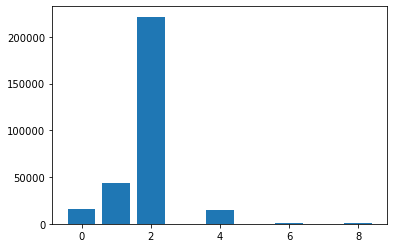

In [19]:
#Imprimi gráfico - Chi2
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train.iloc[:,0:9], y_train)
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


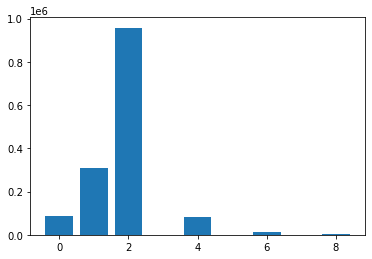

In [20]:
#Imprimi gráfico - Seleção univariada
fs = SelectKBest(score_func=f_classif, k=5)
fs.fit(X_train.iloc[:,0:9], y_train)
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [21]:
gc.collect()

6427

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


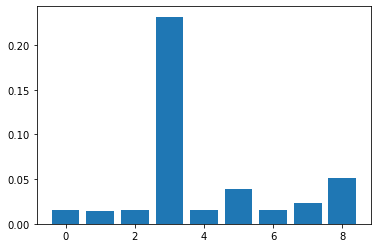

In [22]:
#Imprimi gráfico - Mutual information
fs = SelectKBest(score_func=mutual_info_classif, k=5)
fs.fit(X_train.iloc[:,0:9], y_train)
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [23]:
#Imprimi ranking - RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
rfe.fit(X_train.iloc[:,0:9], y_train)
for i in range(X_train.iloc[:,0:9].shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected False, Rank: 5.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected False, Rank: 4.000
Column: 5, Selected False, Rank: 3.000
Column: 6, Selected False, Rank: 2.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected True, Rank: 1.000


In [24]:
#Definir a estratégia de seleção de atributos
smode = 'Chi2'
X2 = X_train
if (smode == 'Chi2'): #Chi2
    selector = SelectKBest(chi2, k=5)
    X2 = selector.fit_transform(X_train.iloc[:,0:9], y_train)
elif (smode == 'SU'): #Seleção univariada
    selector = SelectKBest(f_classif, k=5)
    X2 = selector.fit_transform(X_train.iloc[:,0:9], y_train)
elif (smode == 'MI'): #Mutual information
    selector = SelectKBest(mutual_info_classif, k=5)
    X2 = selector.fit_transform(X_train.iloc[:,0:9], y_train)    
    mutual_info_classif
elif (smode == 'RFE'): #Recursive Feature Elimination
    selector = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
    X2 = selector.fit_transform(X_train.iloc[:,0:9], y_train)
elif (smode == 'PCA'): #PCA
    from sklearn.decomposition import PCA
    selector = PCA(n_components=5)
    X2 = selector.fit_transform(X_train.iloc[:,0:9], y_train)

In [25]:
#Nome das colunas selecionadas
X2_columns = X_train.iloc[:,0:9].columns
cols_sel = X2_columns[selector.get_support()]
print("Colunas selecionadas: ", cols_sel)
cols_excl = list(set(X_train.iloc[:,0:9].columns)-set(cols_sel))
print("Colunas excluídas: ", cols_excl)

Colunas selecionadas:  Index(['NOME_UG', 'NOME_PARTICIPANTE', 'NOME_VENCEDOR',
       'DESCRICAO_ITEM_COMPRA', 'RESULTADO_COMPRA_ANO'],
      dtype='object')
Colunas excluídas:  ['MODALIDADE_COMPRA', 'RESULTADO_COMPRA_MES', 'MUNICIPIO', 'SITUACAO_LICITACAO']


In [26]:
X_train.drop(columns=cols_excl, inplace=True)
X_test.drop(columns=cols_excl, inplace=True)

In [27]:
del X2
del X2_columns
gc.collect()

3176

### Codificação e balanceamento

In [28]:
#Definir a estratégia de balanceamento
smode = 'smote'
if (smode == 'under'):
    from imblearn.under_sampling import RandomUnderSampler
    samp = RandomUnderSampler(random_state=42, sampling_strategy = 'majority')
elif (smode == 'over'):
    from imblearn.over_sampling import RandomOverSampler
    samp = RandomOverSampler(sampling_strategy='minority')
elif (smode == 'smote'):
    from imblearn.over_sampling import SMOTE
    samp = SMOTE()
elif (smode == 'smoteenn'):
    from imblearn.combine import SMOTEENN
    samp = SMOTEENN(random_state=42)  
if (smode != 'na'):
    X_train, y_train = samp.fit_resample(X_train, y_train)

## Aprendizado

In [29]:
import time

In [30]:
n = gc.collect()
print("Número de objetos coletados pela função GC:", n)
print("Objetos restantes:", gc.garbage)

Número de objetos coletados pela função GC: 25
Objetos restantes: []


In [79]:
from sklearn.ensemble import AdaBoostClassifier
clf_ce = executar_modelo("AdaBoost", "SIM", AdaBoostClassifier(), X_train, X_test)
clf_se = executar_modelo("AdaBoost", "NÃO", AdaBoostClassifier(), X_train.iloc[:,0:5], X_test.iloc[:,0:5])
clf_e = executar_modelo("AdaBoost", "SOMENTE", AdaBoostClassifier(), X_train.iloc[:,6:], X_test.iloc[:,6:])
#gera_curva_roc("AdaBoost", clf_ce, clf_se)
#inicio = time.time()
#explicar_modelo_shap_arvore ("AdaBoost", clf_ce)
#print(time.time() - inicio)

Classificação do modelo:  AdaBoost . Variáveis estatísticas:  SIM


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Matthews correlation coefficient (MCC): -0.02624949271832372
              precision    recall  f1-score   support

         0.0       0.25      1.00      0.40    104500
         1.0       0.51      0.00      0.00    314505

    accuracy                           0.25    419005
   macro avg       0.38      0.50      0.20    419005
weighted avg       0.44      0.25      0.10    419005

Classificação do modelo:  AdaBoost . Variáveis estatísticas:  NÃO


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Matthews correlation coefficient (MCC): 0.12063177365959533
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98    405726
         1.0       0.49      0.03      0.06     13279

    accuracy                           0.97    419005
   macro avg       0.73      0.52      0.52    419005
weighted avg       0.95      0.97      0.95    419005

Classificação do modelo:  AdaBoost . Variáveis estatísticas:  SOMENTE


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Matthews correlation coefficient (MCC): -0.02624949271832372
              precision    recall  f1-score   support

         0.0       0.25      1.00      0.40    104500
         1.0       0.51      0.00      0.00    314505

    accuracy                           0.25    419005
   macro avg       0.38      0.50      0.20    419005
weighted avg       0.44      0.25      0.10    419005



In [80]:
from sklearn.tree import DecisionTreeClassifier
clf_ce = executar_modelo("Árvore de decisão", "SIM", DecisionTreeClassifier(class_weight='balanced', max_depth=5), X_train, X_test)
clf_se = executar_modelo("Árvore de decisão", "NÃO", DecisionTreeClassifier(class_weight='balanced', max_depth=5), X_train.iloc[:,0:5], X_test.iloc[:,0:5])
clf_e = executar_modelo("Árvore de decisão", "SOMENTE", DecisionTreeClassifier(class_weight='balanced', max_depth=5), X_train.iloc[:,6:], X_test.iloc[:,6:])
#gera_curva_roc("Árvore de decisão", clf_ce, clf_se)
#inicio = time.time()
#explicar_modelo_shap_arvore ("Árvore de decisão", clf_ce)
#print(time.time() - inicio)

Classificação do modelo:  Árvore de decisão . Variáveis estatísticas:  SIM
Matthews correlation coefficient (MCC): 0.26485153905966125
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    418238
         1.0       0.25      0.29      0.27       767

    accuracy                           1.00    419005
   macro avg       0.62      0.64      0.63    419005
weighted avg       1.00      1.00      1.00    419005

Classificação do modelo:  Árvore de decisão . Variáveis estatísticas:  NÃO
Matthews correlation coefficient (MCC): 0.33800433983481243
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    417239
         1.0       0.47      0.24      0.32      1766

    accuracy                           1.00    419005
   macro avg       0.74      0.62      0.66    419005
weighted avg       0.99      1.00      0.99    419005

Classificação do modelo:  Árvore de decisão . Variáveis estatísticas:  SOMEN

Classificação do modelo:  Extra Trees . Variáveis estatísticas:  SIM


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Matthews correlation coefficient (MCC): 0.6407781420278291
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    418310
         1.0       0.56      0.73      0.64       695

    accuracy                           1.00    419005
   macro avg       0.78      0.87      0.82    419005
weighted avg       1.00      1.00      1.00    419005

Classificação do modelo:  Extra Trees . Variáveis estatísticas:  NÃO


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Matthews correlation coefficient (MCC): 0.5816938616331017
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    418696
         1.0       0.34      1.00      0.51       309

    accuracy                           1.00    419005
   macro avg       0.67      1.00      0.75    419005
weighted avg       1.00      1.00      1.00    419005

Classificação do modelo:  Extra Trees . Variáveis estatísticas:  SOMENTE


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Matthews correlation coefficient (MCC): 0.19309744130754075
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    413017
         1.0       0.51      0.08      0.13      5988

    accuracy                           0.99    419005
   macro avg       0.75      0.54      0.56    419005
weighted avg       0.98      0.99      0.98    419005

Explicação do modelo com SHAP


  0%|          | 0/419005 [00:00<?, ?it/s]

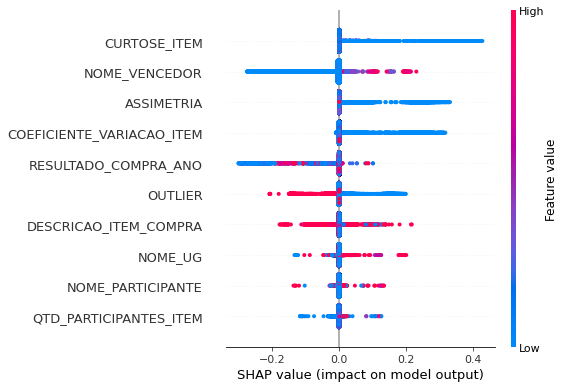

25069.779875278473


In [81]:
from sklearn.ensemble import ExtraTreesClassifier
clf_ce = executar_modelo("Extra Trees", "SIM", ExtraTreesClassifier(class_weight='balanced'), X_train, X_test)
clf_se = executar_modelo("Extra Trees", "NÃO", ExtraTreesClassifier(class_weight='balanced'), X_train.iloc[:,0:5], X_test.iloc[:,0:5])
clf_e = executar_modelo("Extra Trees", "SOMENTE", ExtraTreesClassifier(class_weight='balanced'), X_train.iloc[:,6:], X_test.iloc[:,6:])
#gera_curva_roc("Extra Trees", clf_ce, clf_se)
inicio = time.time()
explicar_modelo_shap ("Extra Trees", clf_ce)
print(time.time() - inicio)

Classificação do modelo:  Gradient Boosting . Variáveis estatísticas:  SIM


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Matthews correlation coefficient (MCC): 0.2515561985699505
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    415446
         1.0       0.50      0.13      0.20      3559

    accuracy                           0.99    419005
   macro avg       0.75      0.56      0.60    419005
weighted avg       0.99      0.99      0.99    419005

Classificação do modelo:  Gradient Boosting . Variáveis estatísticas:  NÃO


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Matthews correlation coefficient (MCC): 0.4911288175970257
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    418123
         1.0       0.49      0.50      0.49       882

    accuracy                           1.00    419005
   macro avg       0.74      0.75      0.75    419005
weighted avg       1.00      1.00      1.00    419005

Classificação do modelo:  Gradient Boosting . Variáveis estatísticas:  SOMENTE


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Matthews correlation coefficient (MCC): 0.18871617515495537
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    412748
         1.0       0.51      0.07      0.13      6257

    accuracy                           0.99    419005
   macro avg       0.75      0.54      0.56    419005
weighted avg       0.98      0.99      0.98    419005

Explicação do modelo com SHAP


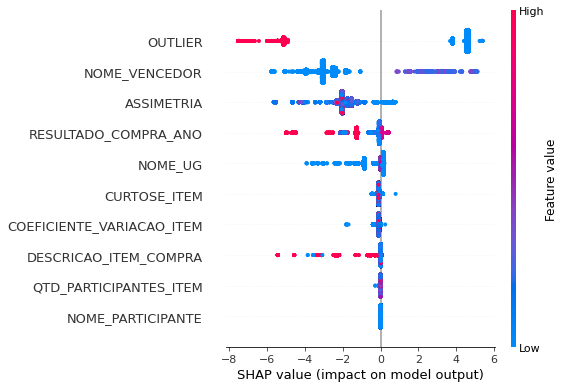

42.06764626502991


In [82]:
from sklearn.ensemble import GradientBoostingClassifier
clf_ce = executar_modelo("Gradient Boosting", "SIM", GradientBoostingClassifier(), X_train, X_test)
clf_se = executar_modelo("Gradient Boosting", "NÃO", GradientBoostingClassifier(), X_train.iloc[:,0:5], X_test.iloc[:,0:5])
clf_e = executar_modelo("Gradient Boosting", "SOMENTE", GradientBoostingClassifier(), X_train.iloc[:,6:], X_test.iloc[:,6:])
#gera_curva_roc("Gradient Boosting", clf_ce, clf_se)
inicio = time.time()
explicar_modelo_shap_arvore ("Gradient Boosting", clf_ce)
print(time.time() - inicio)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf_ce = executar_modelo("K-NN", "SIM", KNeighborsClassifier(n_neighbors=5, n_jobs=-1), X_train, X_test)
clf_se = executar_modelo("K-NN", "NÃO", KNeighborsClassifier(n_neighbors=5, n_jobs=-1), X_train.iloc[:,0:5], X_test.iloc[:,0:5])
clf_e = executar_modelo("K-NN", "SOMENTE", KNeighborsClassifier(n_neighbors=5, n_jobs=-1), X_train.iloc[:,6:], X_test.iloc[:,6:])
#gera_curva_roc("K-NN", clf_ce, clf_se)
inicio = time.time()
explicar_modelo_shap ("K-NN", clf_ce)
print(time.time() - inicio)

Classificação do modelo:  K-NN . Variáveis estatísticas:  SIM


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Matthews correlation coefficient (MCC): 0.9794162986929196
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    418071
         1.0       0.99      0.96      0.98       934

    accuracy                           1.00    419005
   macro avg       1.00      0.98      0.99    419005
weighted avg       1.00      1.00      1.00    419005

Classificação do modelo:  K-NN . Variáveis estatísticas:  NÃO


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Matthews correlation coefficient (MCC): 0.940522509677449
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    418039
         1.0       0.97      0.91      0.94       966

    accuracy                           1.00    419005
   macro avg       0.99      0.96      0.97    419005
weighted avg       1.00      1.00      1.00    419005

Classificação do modelo:  K-NN . Variáveis estatísticas:  SOMENTE


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Matthews correlation coefficient (MCC): 0.5673626657009941
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    416585
         1.0       0.93      0.35      0.51      2420

    accuracy                           1.00    419005
   macro avg       0.96      0.67      0.75    419005
weighted avg       1.00      1.00      1.00    419005

Explicação do modelo com SHAP


  0%|          | 0/419005 [00:00<?, ?it/s]

In [31]:
from sklearn.linear_model import Lasso
clf_ce = executar_modelo("Lasso", "SIM", Lasso(alpha=0.1), X_train, X_test)
clf_se = executar_modelo("Lasso", "NÃO", Lasso(alpha=0.1), X_train.iloc[:,0:5], X_test.iloc[:,0:5])
clf_e = executar_modelo("Lasso", "SOMENTE", Lasso(alpha=0.1), X_train.iloc[:,6:], X_test.iloc[:,6:])
#gera_curva_roc("Lasso", clf_ce, clf_se)
#inicio = time.time()
#explicar_modelo_shap_linear ("Lasso", clf_ce)
#print(time.time() - inicio)

Classificação do modelo:  Lasso . Variáveis estatísticas:  SIM
Matthews correlation coefficient (MCC): 0.08719172951347717
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88    326065
         1.0       1.00      0.01      0.02     92940

    accuracy                           0.78    419005
   macro avg       0.89      0.50      0.45    419005
weighted avg       0.83      0.78      0.69    419005

Classificação do modelo:  Lasso . Variáveis estatísticas:  NÃO
Matthews correlation coefficient (MCC): 0.0


Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    419005
         1.0       0.00      0.00      0.00         0

    accuracy                           1.00    419005
   macro avg       0.50      0.50      0.50    419005
weighted avg       1.00      1.00      1.00    419005

Classificação do modelo:  Lasso . Variáveis estatísticas:  SOMENTE
Matthews correlation coefficient (MCC): 0.08719172951347717
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88    326065
         1.0       1.00      0.01      0.02     92940

    accuracy                           0.78    419005
   macro avg       0.89      0.50      0.45    419005
weighted avg       0.83      0.78      0.69    419005



Classificação do modelo:  Regressão Logística . Variáveis estatísticas:  SIM


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Matthews correlation coefficient (MCC): 0.8148519138824664
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    417642
         1.0       1.00      0.66      0.80      1363

    accuracy                           1.00    419005
   macro avg       1.00      0.83      0.90    419005
weighted avg       1.00      1.00      1.00    419005

Classificação do modelo:  Regressão Logística . Variáveis estatísticas:  NÃO


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Matthews correlation coefficient (MCC): 0.700348555580391
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    417162
         1.0       1.00      0.49      0.66      1843

    accuracy                           1.00    419005
   macro avg       1.00      0.75      0.83    419005
weighted avg       1.00      1.00      1.00    419005

Classificação do modelo:  Regressão Logística . Variáveis estatísticas:  SOMENTE


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Matthews correlation coefficient (MCC): 0.31793252177028253
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    410211
         1.0       1.00      0.10      0.19      8794

    accuracy                           0.98    419005
   macro avg       0.99      0.55      0.59    419005
weighted avg       0.98      0.98      0.97    419005

Explicação do modelo com SHAP


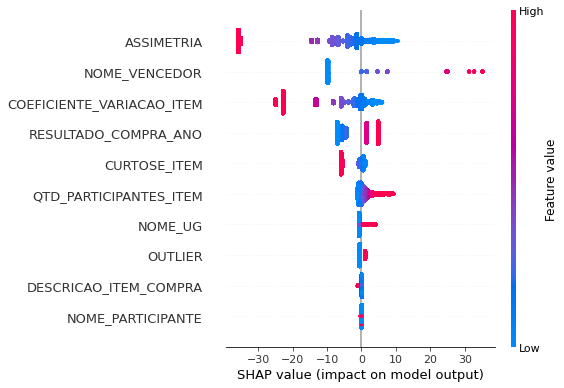

3795.3592553138733


In [32]:
from sklearn.linear_model import LogisticRegression
clf_ce = executar_modelo("Regressão Logística", "SIM", LogisticRegression(class_weight='balanced'), X_train, X_test)
clf_se = executar_modelo("Regressão Logística", "NÃO", LogisticRegression(class_weight='balanced'), X_train.iloc[:,0:5], X_test.iloc[:,0:5])
clf_e = executar_modelo("Regressão Logística", "SOMENTE", LogisticRegression(class_weight='balanced'), X_train.iloc[:,6:], X_test.iloc[:,6:])
#gera_curva_roc("Regressão Logística", clf_ce, clf_se)
inicio = time.time()
explicar_modelo_shap_linear ("Regressão Logística", clf_ce)
print(time.time() - inicio)

In [33]:
from sklearn.naive_bayes import GaussianNB
clf_ce = executar_modelo("Naive Bayes (Gaussiano)", "SIM", GaussianNB(), X_train, X_test)
clf_se = executar_modelo("Naive Bayes (Gaussiano)", "NÃO", GaussianNB(), X_train.iloc[:,0:5], X_test.iloc[:,0:5])
clf_e = executar_modelo("Naive Bayes (Gaussiano)", "SOMENTE", GaussianNB(), X_train.iloc[:,6:], X_test.iloc[:,6:])
#gera_curva_roc("Naive Bayes (Gaussiano)", clf_ce, clf_se)
#inicio = time.time()
#explicar_modelo_shap ("Naive Bayes (Gaussiano)", clf_ce)
#print(time.time() - inicio)

Classificação do modelo:  Naive Bayes (Gaussiano) . Variáveis estatísticas:  SIM


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Matthews correlation coefficient (MCC): 0.36162213498479795
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    412175
         1.0       1.00      0.13      0.23      6830

    accuracy                           0.99    419005
   macro avg       0.99      0.57      0.61    419005
weighted avg       0.99      0.99      0.98    419005

Classificação do modelo:  Naive Bayes (Gaussiano) . Variáveis estatísticas:  NÃO


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Matthews correlation coefficient (MCC): 0.2987490870997252
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    409073
         1.0       1.00      0.09      0.17      9932

    accuracy                           0.98    419005
   macro avg       0.99      0.55      0.58    419005
weighted avg       0.98      0.98      0.97    419005

Classificação do modelo:  Naive Bayes (Gaussiano) . Variáveis estatísticas:  SOMENTE


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Matthews correlation coefficient (MCC): 0.31394452904304276
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    409991
         1.0       1.00      0.10      0.18      9014

    accuracy                           0.98    419005
   macro avg       0.99      0.55      0.59    419005
weighted avg       0.98      0.98      0.97    419005



In [34]:
from sklearn.naive_bayes import BernoulliNB
clf_ce = executar_modelo("Naive Bayes (Bernoulli)", "SIM", BernoulliNB(), X_train, X_test)
clf_se = executar_modelo("Naive Bayes (Bernoulli)", "NÃO", BernoulliNB(), X_train.iloc[:,0:5], X_test.iloc[:,0:5])
clf_e = executar_modelo("Naive Bayes (Bernoulli)", "SOMENTE", BernoulliNB(), X_train.iloc[:,6:], X_test.iloc[:,6:])
#gera_curva_roc("Naive Bayes (Bernoulli)", clf_ce, clf_se)
#inicio = time.time()
#explicar_modelo_shap ("Naive Bayes (Bernoulli)", clf_ce)
#print(time.time() - inicio)

Classificação do modelo:  Naive Bayes (Bernoulli) . Variáveis estatísticas:  SIM


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Matthews correlation coefficient (MCC): 0.20024611601158415
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97    397570
         1.0       1.00      0.04      0.08     21435

    accuracy                           0.95    419005
   macro avg       0.97      0.52      0.53    419005
weighted avg       0.95      0.95      0.93    419005

Classificação do modelo:  Naive Bayes (Bernoulli) . Variáveis estatísticas:  NÃO


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Matthews correlation coefficient (MCC): 0.47434647018701004
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    415017
         1.0       1.00      0.23      0.37      3988

    accuracy                           0.99    419005
   macro avg       1.00      0.61      0.68    419005
weighted avg       0.99      0.99      0.99    419005

Classificação do modelo:  Naive Bayes (Bernoulli) . Variáveis estatísticas:  SOMENTE


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Matthews correlation coefficient (MCC): -0.024117952575105652
              precision    recall  f1-score   support

         0.0       0.25      1.00      0.40    104482
         1.0       0.53      0.00      0.00    314523

    accuracy                           0.25    419005
   macro avg       0.39      0.50      0.20    419005
weighted avg       0.46      0.25      0.10    419005



In [35]:
from sklearn.neural_network import MLPClassifier
clf_ce = executar_modelo("MLP", "SIM", MLPClassifier(), X_train, X_test)
clf_se = executar_modelo("MLP", "NÃO", MLPClassifier(), X_train.iloc[:,0:5], X_test.iloc[:,0:5])
clf_e = executar_modelo("MLP", "SOMENTE", MLPClassifier(), X_train.iloc[:,6:], X_test.iloc[:,6:])
#gera_curva_roc("MLP", clf_ce, clf_se)

Classificação do modelo:  MLP . Variáveis estatísticas:  SIM


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Matthews correlation coefficient (MCC): 0.9314127205041217
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    417961
         1.0       1.00      0.87      0.93      1044

    accuracy                           1.00    419005
   macro avg       1.00      0.93      0.96    419005
weighted avg       1.00      1.00      1.00    419005

Classificação do modelo:  MLP . Variáveis estatísticas:  NÃO


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Matthews correlation coefficient (MCC): 0.8299867940299592
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    417694
         1.0       1.00      0.69      0.82      1311

    accuracy                           1.00    419005
   macro avg       1.00      0.85      0.91    419005
weighted avg       1.00      1.00      1.00    419005

Classificação do modelo:  MLP . Variáveis estatísticas:  SOMENTE


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Matthews correlation coefficient (MCC): 0.3645633397446893
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    412283
         1.0       1.00      0.13      0.24      6722

    accuracy                           0.99    419005
   macro avg       0.99      0.57      0.62    419005
weighted avg       0.99      0.99      0.98    419005



NameError: name 'explicar_modelo_shap_deep' is not defined

In [ ]:
inicio = time.time()
explicar_modelo_shap ("Neural Net", clf_ce)
print(time.time() - inicio)

Explicação do modelo com SHAP


  0%|          | 0/419005 [00:00<?, ?it/s]

In [ ]:
#from sklearn.gaussian_process import GaussianProcessClassifier
#inicio = time.time()
#clf_ce = executar_modelo("Gaussian Process", "SIM", GaussianProcessClassifier(), X_train, X_test)
#clf_se = executar_modelo("Gaussian Process", "NÃO", GaussianProcessClassifier(), X_train.iloc[:,0:5], X_test.iloc[:,0:5])
#gera_curva_roc("Gaussian Process", clf_ce, clf_se)
#explicar_modelo_shap ("Gaussian Process", clf_ce)
#print(time.time() - inicio)

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf_ce = executar_modelo("QDA", "SIM", QuadraticDiscriminantAnalysis(), X_train, X_test)
clf_se = executar_modelo("QDA", "SOMENTE", QuadraticDiscriminantAnalysis(), X_train.iloc[:,0:5], X_test.iloc[:,0:5])
clf_e = executar_modelo("QDA", "NÃO", QuadraticDiscriminantAnalysis(), X_train.iloc[:,6:], X_test.iloc[:,6:])
#gera_curva_roc("QDA", clf_ce, clf_se)
#inicio = time.time()
#explicar_modelo_shap ("Quadratic Discriminant Analysis", clf_ce)
#print(time.time() - inicio)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_ce = executar_modelo("Random Forest", "SIM", RandomForestClassifier(class_weight='balanced'), X_train, X_test)
clf_se = executar_modelo("Random Forest", "NÃO", RandomForestClassifier(class_weight='balanced'), X_train.iloc[:,0:5], X_test.iloc[:,0:5])
clf_e = executar_modelo("Random Forest", "SOMENTE", RandomForestClassifier(class_weight='balanced'), X_train.iloc[:,6:], X_test.iloc[:,6:])
#gera_curva_roc("Random Forest", clf_ce, clf_se)
#inicio = time.time()
#explicar_modelo_shap_arvore ("Random Forest", clf_ce)
#print(time.time() - inicio)

In [ ]:
from sklearn.linear_model import RidgeClassifierCV
clf_ce = executar_modelo("Ridge", "SIM", RidgeClassifierCV(), X_train, X_test)
clf_se = executar_modelo("Ridge", "NÃO", RidgeClassifierCV(), X_train.iloc[:,0:5], X_test.iloc[:,0:5])
clf_e = executar_modelo("Ridge", "SOMENTE", RidgeClassifierCV(), X_train.iloc[:,6:], X_test.iloc[:,6:])
#gera_curva_roc("Ridge", clf_ce, clf_se)
inicio = time.time()
explicar_modelo_shap_linear ("Ridge", clf_ce)
print(time.time() - inicio)

In [ ]:
from sklearn.linear_model import SGDClassifier
clf_ce = executar_modelo("SGD", "SIM", SGDClassifier(class_weight='balanced'), X_train, X_test)
clf_se = executar_modelo("SGD", "NÃO", SGDClassifier(class_weight='balanced'), X_train.iloc[:,0:5], X_test.iloc[:,0:5])
clf_e = executar_modelo("SGD", "SOMENTE", SGDClassifier(class_weight='balanced'), X_train.iloc[:,6:], X_test.iloc[:,6:])
#gera_curva_roc("SGD", clf_ce, clf_se)
inicio = time.time()
explicar_modelo_shap_linear ("SGD", clf_ce)
print(time.time() - inicio)

In [ ]:
from sklearn import svm
clf_ce = executar_modelo("SVM", "SIM", svm.SVC(class_weight='balanced'), X_train, X_test)
clf_se = executar_modelo("SVM", "NÃO", svm.SVC(class_weight='balanced'), X_train.iloc[:,0:5], X_test.iloc[:,0:5])
clf_e = executar_modelo("SVM", "SOMENTE", svm.SVC(class_weight='balanced'), X_train.iloc[:,6:], X_test.iloc[:,6:])
#gera_curva_roc("SVM", clf_ce, clf_se)
inicio = time.time()
explicar_modelo_shap ("SVM", clf_ce)
print(time.time() - inicio)

In [ ]:
from xgboost import XGBClassifier
clf_ce = executar_modelo("XGBoost", "SIM", XGBClassifier(), X_train, X_test)
clf_se = executar_modelo("XGBoost", "NÃO", XGBClassifier(), X_train.iloc[:,0:5], X_test.iloc[:,0:5])
clf_e = executar_modelo("XGBoost", "SOMENTE", XGBClassifier(), X_train.iloc[:,6:], X_test.iloc[:,6:])
#gera_curva_roc("XGBoost", clf_ce, clf_se)
inicio = time.time()
explicar_modelo_shap_arvore ("XGBoost", clf_ce)
print(time.time() - inicio)

In [ ]:
def treina_OneClassSVM (estat, X_train2, X_test2):
    print("Classificação do modelo: OneClassSVM. Variáveis estatísticas: ", estat)
    #Só treina com os dados normais
    #X_train_t = X_train2[y_train['LICITACAO_CONLUIO'] == 0.0]
    X_train_t = X_train2[y_train['LICITACAO_CONLUIO'] == 1.0]
    clf = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.1)
    clf.fit(X_train_t)
    y_pred = clf.predict(X_test2)
    #Modelo classifica -1 para anômolos e 1 para normais, ou seja, precisa inverter
    #y_test_t = y_test.replace(1.0, -1.0)
    #y_test_t = y_test_t.replace(0.0, 1.0)
    y_test_t = y_test.replace(0.0, -1.0)
    print(classification_report(y_pred, y_test_t))
    mcc = matthews_corrcoef(y_test_t, y_pred)
    print('Matthews correlation coefficient (MCC):', mcc)

In [ ]:
from sklearn.svm import OneClassSVM
clf_ce = treina_OneClassSVM("SIM", X_train, X_test)
clf_se = treina_OneClassSVM("NÃO", X_train.iloc[:,0:5], X_test.iloc[:,0:5])
clf_e = treina_OneClassSVM("SOMENTE", X_train.iloc[:,6:], X_test.iloc[:,6:])
#gera_curva_roc("OneClassSVM", clf_ce, clf_se)
#inicio = time.time()
#explicar_modelo_shap ("OneClassSVM", clf_ce)
#print(time.time() - inicio)

## Feature importance

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Abordagem para algoritmos que não fornecem importância de características
from sklearn.inspection import permutation_importance
def feature_importance_permutation (model_name, model):
    model.fit(X_train, y_train)
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
    #Ordenar importância
    sorted_idx = result.importances_mean.argsort()
    #Plotar importância
    plt.barh(np.array(X_train.columns)[sorted_idx], result.importances_mean[sorted_idx], align='center', height=0.5)
    plt.yticks(range(len(sorted_idx)), np.array(X_train.columns)[sorted_idx])
    plt.xlabel('Importância da permutação')
    plt.title('Importância dos atributos ('+model_name+')')
    plt.show()

In [ ]:
#Abordagem para algoritmos que fornecem importância de características por padrão, com atributo coef (tipicamente modelos lineares)
def feature_importance_linear (model_name, model):
    model.fit(X_train, y_train)
    coefficients = np.abs(model.coef_)
    #Normalizar importância
    coefficients = coefficients / coefficients.sum()
    #Ordenar importância
    sorted_idx = np.argsort(coefficients)
    #Plotar importância
    plt.barh(np.array(X_train.columns)[sorted_idx], coefficients[sorted_idx], align='center', height=0.5)
    plt.yticks(range(len(sorted_idx)), np.array(X_train.columns)[sorted_idx])
    plt.xlabel('Importância dos atributos')
    plt.title('Importância dos atributos ('+model_name+')')
    plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier
inicio = time.time()
feature_importance_permutation ('MLP', MLPClassifier())
print(time.time() - inicio)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
inicio = time.time()
feature_importance_permutation ('K-NN', KNeighborsClassifier(n_neighbors=5, n_jobs=-1))
print(time.time() - inicio)

In [ ]:
from sklearn.linear_model import LogisticRegression
inicio = time.time()
feature_importance_linear ('Regressão Logística', LogisticRegression(class_weight='balanced'))
print(time.time() - inicio)

In [ ]:
from sklearn.linear_model import SGDClassifier
inicio = time.time()
feature_importance_linear ('SGD', SGDClassifier(class_weight='balanced'))
print(time.time() - inicio)

In [ ]:
from sklearn.linear_model import RidgeClassifierCV
inicio = time.time()
feature_importance_linear ('Ridge', RidgeClassifierCV())
print(time.time() - inicio)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
inicio = time.time()
feature_importance = model.feature_importances_
#Normalizar importância
feature_importance = feature_importance / feature_importance.sum()
#Ordenar importância
sorted_idx = np.argsort(feature_importance)
#Plotar importância
plt.barh(np.array(X_train.columns)[sorted_idx], feature_importance[sorted_idx], align='center', height=0.5)
plt.yticks(range(len(sorted_idx)), np.array(X_train.columns)[sorted_idx])
plt.xlabel('Importância dos atributos')
plt.title('Importância dos atributos (Extra Tree)')
plt.show()
print(time.time() - inicio)

In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier(class_weight='balanced')
model.fit(X_train, y_train)
inicio = time.time()
#Plotar importância
xgb.plot_importance(model, importance_type='weight', grid=False, show_values=False, height=0.5)
plt.xlabel('Importância dos atributos')
plt.title('Importância dos atributos (XGBoost)')
plt.show()
print(time.time() - inicio)

## Explicações com LIME

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
def explicar_modelo_lime (clf, y_pred, y_pred_prob, X_train, X_test, X_columns, i):
    print('Explicação do modelo com LIME')
    print('Instância:', i)
    print('Predict: ', y_pred[i])
    print('Predict proba: ', y_pred_prob[i])
    class_names = ['NAO', 'SIM'] 
    explainer = LimeTabularExplainer(X_train.to_numpy(), feature_names=X_columns, class_names=class_names, verbose=True, discretize_continuous=True, mode='classification')
    exp = explainer.explain_instance(X_test.iloc[i], clf.predict_proba, num_features=10)
    fig = exp.as_pyplot_figure(label=1)
    #exp.show_in_notebook(show_table=True)
    df = pd.DataFrame(exp.as_list(),columns=['Atributo','Contribuição'])
    display(df)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
clf = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test).round()
y_pred_prob = clf.predict_proba(X_test)
#Métricas gerais
mcc = matthews_corrcoef(y_test, y_pred)
print('Matthews correlation coefficient (MCC):', mcc)
print(confusion_matrix(y_test, y_pred))
print(collections.Counter(y_pred))
print(y_pred)

In [ ]:
print(X_test.shape[0])
for index, row in X_test.iterrows():
    i = X_test.index.get_loc(index)
    if (y_pred[i] == 1.0):
        print("i: ", i, "pred: ", y_pred[i], "conl:", y_test.iloc[i])

In [ ]:
print(X_test.shape[0])
for index, row in X_test.iterrows():
    i = X_test.index.get_loc(index)
    if (y_pred[i] == 0.0 and y_test['LICITACAO_CONLUIO'].iloc[i] == 1.0):
        print("i: ", i, "pred: ", y_pred[i], "conl:", y_test.iloc[i])

In [ ]:
explicar_modelo_lime (clf, y_pred, y_pred_prob, X_train, X_test, X_train.columns, 1099)

In [ ]:
explicar_modelo_lime (clf, y_pred, y_pred_prob, X_train, X_test, X_train.columns, 2899)

In [ ]:
explicar_modelo_lime (clf, y_pred, y_pred_prob, X_train, X_test, X_train.columns, 282873)

In [ ]:
explicar_modelo_lime (clf, y_pred, y_pred_prob, X_train, X_test, X_train.columns, 1)